In [8]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn,optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
from utils import *
# import hiddenlayer
import onnx
import onnx.utils
import onnx.version_converter
# from torchvision.transforms import ToTensor, Lambda



In [9]:
# class NN(nn.Module):
#     def __init__(self, num_classes):
#         super(NN, self).__init__()

#         self.block_1 = nn.Sequential(
#                 nn.Conv2d(in_channels=1,
#                           out_channels=64,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           # (1(32-1)- 32 + 3)/2 = 1
#                           padding=1), 
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=64,
#                           out_channels=64,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))
#         )
        
#         self.block_2 = nn.Sequential(
#                 nn.Conv2d(in_channels=64,
#                           out_channels=128,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=128,
#                           out_channels=128,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))
#         )
        
#         self.block_3 = nn.Sequential(        
#                 nn.Conv2d(in_channels=128,
#                           out_channels=256,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=256,
#                           out_channels=256,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),        
#                 nn.Conv2d(in_channels=256,
#                           out_channels=256,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=256,
#                           out_channels=256,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))
#         )
        
          
#         self.block_4 = nn.Sequential(   
#                 nn.Conv2d(in_channels=256,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),        
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),        
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),   
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))
#         )
        
#         self.block_5 = nn.Sequential(
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),            
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),            
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),   
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))             
#         )
        
#         self.classifier = nn.Sequential(
#                 nn.Linear(512*2*2, 4096),
#                 nn.ReLU(),   
#                 nn.Linear(4096, 4096),
#                 nn.ReLU(),
#                 nn.Linear(4096, num_classes)
#         )
#         for m in self.modules():
#             if isinstance(m, torch.nn.Conv2d):
#                 #n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
#                 #m.weight.data.normal_(0, np.sqrt(2. / n))
#                 m.weight.detach().normal_(0, 0.05)
#                 if m.bias is not None:
#                     m.bias.detach().zero_()
#             elif isinstance(m, torch.nn.Linear):
#                 m.weight.detach().normal_(0, 0.05)
#                 m.bias.detach().detach().zero_()
        
#     def forward(self, x):

#         x = self.block_1(x)
#         x = self.block_2(x)
#         x = self.block_3(x)
#         x = self.block_4(x)
#         x = self.block_5(x)

#         logits = self.classifier(x.view(-1, 512*2*2))
#         pred = F.softmax(logits, dim=1)

#         return logits,pred
class NN(nn.Module):
    def __init__(self, num_classes):
        super(NN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = (3,3), padding=(1,1), stride=(1,1)),
            nn.BatchNorm2d(num_features = 64),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = (3,3), padding=(1,1), stride=(1,1)),
            nn.BatchNorm2d(num_features = 64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3,3), padding=(1,1), stride=(1,1)),
            nn.BatchNorm2d(num_features = 128),
            nn.ReLU(),
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (3,3), padding=(1,1), stride=(1,1)),
            nn.BatchNorm2d(num_features = 128),           
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3,3), padding=(1,1), stride=(1,1)),
            nn.BatchNorm2d(num_features = 256),
            nn.ReLU(),
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3,3), padding=(1,1), stride=(1,1)),
            nn.BatchNorm2d(num_features = 256),
            nn.ReLU(),
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3,3), padding=(1,1), stride=(1,1)),
            nn.BatchNorm2d(num_features = 256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.block4 = nn.Sequential(
            nn.Linear(in_features = 256*4*4, out_features = 256),
            nn.ReLU(),
            nn.Linear(in_features = 256, out_features = 128),
            nn.ReLU(),
            nn.Linear(in_features = 128, out_features = 10)
        )
        self.flatten = nn.Flatten()
        self.softmax = F.softmax
        # self.linear_relu_stack = nn.Sequential(
        #     nn.Linear(32*32,512),
        #     nn.ReLU(),
        #     nn.Linear(512,512),
        #     nn.ReLU(),
        #     nn.Linear(512,num_classes),
        #     nn.ReLU()
        # )
        
    def forward(self, x):
        # x = self.flatten(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.flatten(x)
        logits = self.block4(x)
        pred = self.softmax(logits, dim=1)

        return logits,pred

In [10]:

def train_loop(model, train_loader, optimizer, loss_fn, train_loss_list, train_acc_list, device):
    size = len(train_loader.dataset)
    # loss_fn = nn.CrossEntropyLoss()
    # optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_loss, correct = 0, 0
    model.train()
    for i, (x, y) in enumerate(train_loader):
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        # print(x.shape)
        # print(y.shape)
        logits, pred = model.forward(x)
        # print(pred.shape)
        y_pred = pred.argmax(dim=1)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * len(x)
        correct += (y_pred == y).type(torch.float).sum().item()
        if i % 100 == 0:
            loss, current = loss.item(), (i+1) * len(x)
            print(f'Loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')
    train_loss /= size
    correct /= size
    train_loss_list.append(train_loss)
    train_acc_list.append(correct)

def test_loop(model, test_loader, loss_fn, device, test_loss_list, test_acc_list):
    size = len(test_loader.dataset)
    test_loss, correct = 0,0
    model.eval()

    with torch.no_grad():
        for x,y in test_loader:
            x, y = x.to(device), y.to(device)
            logits, pred = model.forward(x)
            y_pred = pred.argmax(dim=1)
            # print(pred.shape)

            test_loss += loss_fn(pred,y).item() * len(x)
            correct += (y_pred == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size

    test_loss_list.append(test_loss)
    test_acc_list.append(correct)

    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')


(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 9)
9
torch.Size([1, 32, 32])


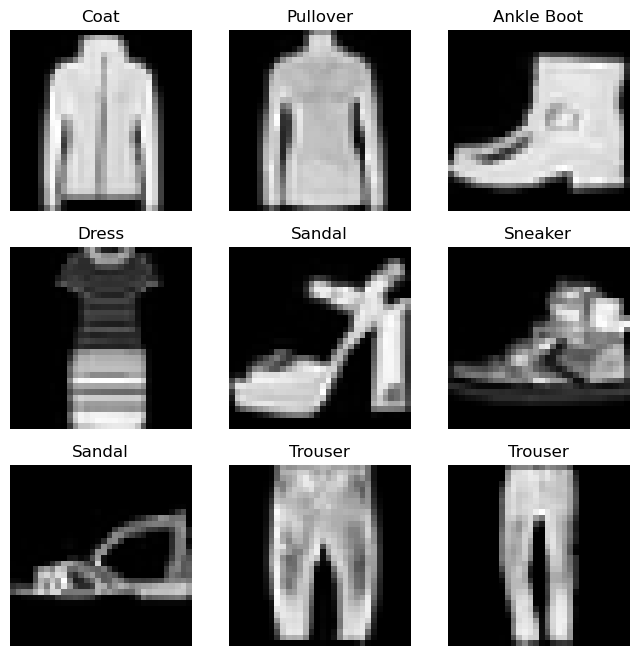

In [11]:
if not os.path.exists("./output"):
    os.mkdir("./output")
if not os.path.exists("./checkpoints"):
    os.mkdir("./checkpoints")
version = "v1"
output_root = f"./output/{version}"

torch.manual_seed(3312)
args = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'batch_size': 64,
    # 'test_batch_size': 1000,
    'epochs': 20,
    'lr': 1e-4
}

model = NN(num_classes=10)
model = model.to(args['device'])


loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args['lr'])

# trans = [transforms.ToTensor()]
# trans.insert(0, transforms.Resize(32))
# trans = transforms.Compose(trans)
trans = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(32),
    transforms.ToTensor()
])

train_dataset = datasets.FashionMNIST(root='./dataset', train=True,
                                      transform=trans, download=True)
test_dataset = datasets.FashionMNIST(root='./dataset', train=False,
                                     transform=trans, download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=args["batch_size"], shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=args["batch_size"], shuffle=True)


labels_map = {
    0:"T_shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}

print(train_dataset[0])
print(train_dataset[0][1])
print(train_dataset[0][0].shape)
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(train_dataset),size=(1,)).item()
    img,label = train_dataset[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(),cmap='gray') # squeeze() can be used to eliminate the dimension whose length is 1
plt.show()


# train_acc_list, test_acc_list = [], []
# train_loss_list, test_loss_list = [], []
# for t in range(args['epochs']):
#     print(f'Epoch {t+1}\n-------------------------------')
#     train_loop(model, train_loader, optimizer, loss_fn, train_loss_list, train_acc_list, args['device'])
#     test_loop(model, test_loader, loss_fn, args['device'], test_loss_list, test_acc_list)
# print('Done!')

# torch.save(model.state_dict(), f'./checkpoints/{version}.pt')

# model.load_state_dict(torch.load(f"./checkpoints/{version}.pt"))

In [21]:
if not os.path.exists(output_root):
    os.mkdir(output_root)
plot_curve(train_acc_list, "Train Accuracy", f"{output_root}/train_acc.pdf")
plot_curve(train_loss_list, "Train Loss",  f"{output_root}/train_loss.pdf")
plot_curve(test_acc_list, "Test Accuracy",  f"{output_root}/test_acc.pdf")
plot_curve(test_loss_list, "Test Loss",  f"{output_root}/test_loss.pdf")

plot_curveII(train_acc_list, test_acc_list, "Train and Test Accuracy",  f"{output_root}/train_test_acc.pdf")
plot_curveII(train_loss_list, test_loss_list, "Train and Test Loss",  f"{output_root}/train_test_loss.pdf")


NameError: name 'train_acc_list' is not defined

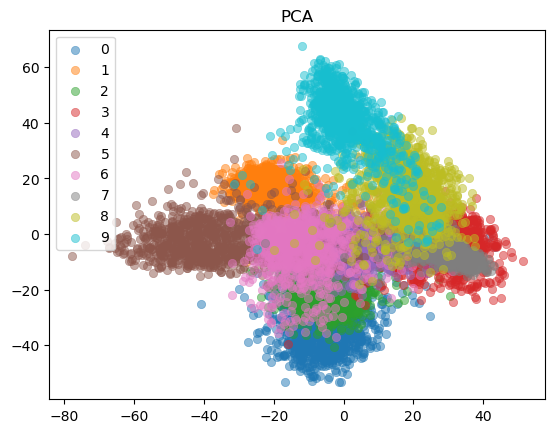

In [12]:
version = "v1"
# model = NN(num_classes=10).to(args["device"])
model.load_state_dict(torch.load(f"./checkpoints/{version}.pt"))
x = torch.randn(args["batch_size"],1,32,32).to(args["device"])
torch.onnx.export(
    model,
    x,
    f'./checkpoints/{version}.onnx',
    export_params=True,
    opset_version=8,
)

model_file = f'./checkpoints/{version}.onnx'
onnx_model = onnx.load(model_file)
onnx.save(onnx.shape_inference.infer_shapes(onnx_model), model_file)

# NetGraph = hiddenlayer.build_graph(model, x)
# NetGraph.save(path=f"{output_root}/NetGraph.pdf", format="pdf")

test_loader_no_shuffle = DataLoader(dataset=test_dataset,
                         batch_size=args["batch_size"], shuffle=False)
features = []
model.eval()
with torch.no_grad():
    for x,y in test_loader_no_shuffle:
        x, y = x.to(args['device']), y.to(args['device'])
        logits, pred = model.forward(x)
        # print(logits.shape)
        features.append(logits.cpu())

tsne = TSNE()
tsne.fit(torch.cat(features, dim = 0).numpy())
tsne.visualization(np.array([label for _, label in test_dataset]), savepth=f"{output_root}/tSNE.pdf")

pca = PCA()
pca.fit(torch.cat(features, dim = 0).numpy())
pca.visualization(np.array([label for _, label in test_dataset]), savepth=f"{output_root}/PCA.pdf")